## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install gdown

In [11]:
import gdown

# Google Drive file ID
file_id = '1dMqtoBvX4pdf5zTnQAxnMq9ro-uGDXyG'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)

# Read the downloaded file
data = pd.read_csv('data.csv')

Downloading...
From: https://drive.google.com/uc?id=1dMqtoBvX4pdf5zTnQAxnMq9ro-uGDXyG
To: /content/data.csv
100%|██████████| 150k/150k [00:00<00:00, 98.9MB/s]


In [ ]:
#data = pd.read_csv(r'https://drive.google.com/file/d/17Mi8cBRDrbkhx7SByIWd_OCuHTY0pe6I/view?usp=drive_link')

In [12]:
data.head()

,Id,updatedtime,device_id
0,data_id,device_id,"co2,kwh_cost,updated_time,raw_value,kwh_R,kwh_..."
1,45,1143,"0.42157500000000003,5621,""2024-08-02 23:59:03""..."
2,46,1145,"0.156075,2081,""2024-08-02 23:59:03"",""{""V1"": ""2..."
3,47,1146,"0.15772500000000003,2103,""2024-08-02 23:59:03""..."
4,49,1148,"0,0,""2024-08-02 23:59:03"",""{""V1"": ""305.80"", ""V..."


In [13]:
data.shape

(1001, 3)

In [14]:
data.columns

Index(['Id', 'updatedtime', 'device_id'], dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1001 non-null   object
 1   updatedtime  1001 non-null   object
 2   device_id    1001 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [16]:
# Null checking
data.isnull().sum()

,0
Id,0
updatedtime,0
device_id,0


In [17]:
for i in data['updatedtime'].unique():
  print(i)

device_id
1143
1145
1146
1148
1149
1150
1151
1147
1154
1156
1157
1158
1159
1160
1161
1162
1163
1165
1166
1167
1168
1170
1155
1152
1173
1175
1176
1187
1188


In [18]:
data['Device_id'] = data['updatedtime']

In [19]:
data

,Id,updatedtime,device_id,Device_id
0,data_id,device_id,"co2,kwh_cost,updated_time,raw_value,kwh_R,kwh_...",device_id
1,45,1143,"0.42157500000000003,5621,""2024-08-02 23:59:03""...",1143
2,46,1145,"0.156075,2081,""2024-08-02 23:59:03"",""{""V1"": ""2...",1145
3,47,1146,"0.15772500000000003,2103,""2024-08-02 23:59:03""...",1146
4,49,1148,"0,0,""2024-08-02 23:59:03"",""{""V1"": ""305.80"", ""V...",1148
...,...,...,...,...
996,1301,1154,"0.010125,135,""2024-09-27 23:59:03"",""{""V1"": ""25...",1154
997,1302,1155,"0.010725000000000002,143,""2024-09-27 23:59:03""...",1155
998,1303,1156,"0.00435,58,""2024-09-27 23:59:03"",""{""V1"": ""9674...",1156
999,1304,1157,"0.00135,18,""2024-09-27 23:59:03"",""{""V1"": ""5614...",1157


In [20]:
# Create new dataframe with Device_id & device_id

data= pd.DataFrame(data=data[['Device_id','device_id']], columns=['Device_id', 'device_id'])

In [21]:
data.shape

(1001, 2)

In [22]:
for i in data.columns:
  print(f"{i} : {data[i].nunique()}")

Device_id : 30
device_id : 1001


In [23]:
#for i in data['device_id'][1]:


In [24]:
store =[]
for i in data['device_id']:
  #for j in i.split(','):
    store.append(i)

In [25]:
len(store[668].split(','))

15

In [26]:
total =[]
sum=0
for n in store:
  if (len(n.split(',')))==12:
    total.append(n)
    sum+=1
print(sum)


588


In [27]:
cols =data['device_id'][0].split(',')

In [28]:
cols

['co2',
 'kwh_cost',
 'updated_time',
 'raw_value',
 'kwh_R',
 'kwh_Y',
 'kwh_B',
 'min_kwh',
 'max_kwh',
 'avg_kwh',
 'min_kwh_time',
 'max_kwh_time']

In [29]:
new = []
for i in store:
  if (len(i.split(',')))==15:
    new.append((i.split(',')))

In [30]:
same = []
for i in new:
  if len(i)==15:
   for j in i:
    same.append(j)

In [31]:
new1 = []
new2 = []

for idx, i in enumerate(total):
    parts = i.split(',')
    if len(parts) == 12:
        new1.append(parts)     # the split data
        new2.append(idx)       # the index of the matching item in `total`

In [32]:
new2[:3]

[0, 1, 2]

In [33]:
new1[:3]

[['co2',
  'kwh_cost',
  'updated_time',
  'raw_value',
  'kwh_R',
  'kwh_Y',
  'kwh_B',
  'min_kwh',
  'max_kwh',
  'avg_kwh',
  'min_kwh_time',
  'max_kwh_time'],
 ['0.00030000000000000003',
  '4',
  '"2024-08-14 23:59:03"',
  '"{"V1": "2047470.00"}"',
  '0.0',
  '0.0',
  '0.0',
  'NULL',
  'NULL',
  'NULL',
  'NULL',
  'NULL'],
 ['0.00007500000000000001',
  '1',
  '"2024-08-14 23:59:03"',
  '"{"V1": "747900.00"}"',
  '0.0',
  '0.0',
  '0.0',
  'NULL',
  'NULL',
  'NULL',
  'NULL',
  'NULL']]

In [34]:
for i in new2:
  print(data['Device_id'][i])

device_id
1143
1145
1146
1148
1149
1150
1151
1143
1145
1146
1148
1149
1150
1151
1143
1145
1146
1148
1149
1150
1151
1143
1145
1146
1147
1148
1149
1150
1151
1143
1145
1146
1147
1148
1149
1150
1151
1143
1145
1146
1147
1148
1149
1151
1143
1145
1146
1147
1148
1149
1151
1143
1145
1146
1147
1148
1149
1151
1143
1145
1146
1147
1148
1149
1151
1143
1143
1145
1146
1147
1148
1149
1151
1143
1145
1146
1147
1148
1149
1151
1143
1154
1156
1157
1158
1159
1160
1161
1162
1163
1165
1166
1167
1168
1170
1143
1154
1156
1157
1158
1159
1160
1161
1162
1163
1165
1166
1167
1168
1143
1154
1156
1157
1158
1159
1160
1161
1162
1163
1165
1166
1167
1168
1143
1154
1156
1157
1158
1159
1160
1161
1162
1163
1165
1166
1167
1168
1143
1154
1156
1157
1158
1159
1161
1162
1163
1165
1166
1167
1168
1143
1154
1156
1157
1158
1159
1160
1161
1162
1163
1165
1166
1167
1168
1143
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1165
1166
1167
1168
1143
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1165
1166
1167
1168
1143
1154
1155
1156


In [35]:
new1[17]

['0',
 '0',
 '"2024-08-15 23:59:03"',
 '"{"V1": "402110.00"}"',
 '0.0',
 '0.0',
 '0.0',
 'NULL',
 'NULL',
 'NULL',
 'NULL',
 'NULL']

In [36]:
cols

['co2',
 'kwh_cost',
 'updated_time',
 'raw_value',
 'kwh_R',
 'kwh_Y',
 'kwh_B',
 'min_kwh',
 'max_kwh',
 'avg_kwh',
 'min_kwh_time',
 'max_kwh_time']

In [37]:
new[60][3]

'"{"V1": "4852784.50"'

In [38]:
ext= pd.DataFrame(data=new1, columns=cols)

In [39]:
ext[1:5]

,co2,kwh_cost,updated_time,raw_value,kwh_R,kwh_Y,kwh_B,min_kwh,max_kwh,avg_kwh,min_kwh_time,max_kwh_time
1,0.00030000000000000003,4,"""2024-08-14 23:59:03""","""{""V1"": ""2047470.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL
2,0.00007500000000000001,1,"""2024-08-14 23:59:03""","""{""V1"": ""747900.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL
3,0,0,"""2024-08-14 23:59:03""","""{""V1"": ""402110.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL
4,0.0010499999999999997,14,"""2024-08-14 23:59:03""","""{""V1"": ""1359750.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL


In [40]:
ext.shape

(588, 12)

In [41]:
len(new2)

588

In [42]:
ext['Device_id'] = data['Device_id'][1:]

In [43]:
ext

,co2,kwh_cost,updated_time,raw_value,kwh_R,kwh_Y,kwh_B,min_kwh,max_kwh,avg_kwh,min_kwh_time,max_kwh_time,Device_id
0,co2,kwh_cost,updated_time,raw_value,kwh_R,kwh_Y,kwh_B,min_kwh,max_kwh,avg_kwh,min_kwh_time,max_kwh_time,NaN
1,0.00030000000000000003,4,"""2024-08-14 23:59:03""","""{""V1"": ""2047470.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL,1143
2,0.00007500000000000001,1,"""2024-08-14 23:59:03""","""{""V1"": ""747900.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL,1145
3,0,0,"""2024-08-14 23:59:03""","""{""V1"": ""402110.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL,1146
4,0.0010499999999999997,14,"""2024-08-14 23:59:03""","""{""V1"": ""1359750.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL,1148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.010125,135,"""2024-09-27 23:59:03""","""{""V1"": ""2509990.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL,1162
584,0.010725000000000002,143,"""2024-09-27 23:59:03""","""{""V1"": 2906213}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL,1163
585,0.00435,58,"""2024-09-27 23:59:03""","""{""V1"": ""967420.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL,1165
586,0.00135,18,"""2024-09-27 23:59:03""","""{""V1"": ""561490.00""}""",0.0,0.0,0.0,NULL,NULL,NULL,NULL,NULL,1166


In [44]:
ext['Device_id'].unique()

array([nan, '1143', '1145', '1146', '1148', '1149', '1150', '1151',
       '1147', '1154', '1156', '1157', '1158', '1159', '1160', '1161',
       '1162', '1163', '1165', '1166', '1167', '1168', '1170', '1155',
       '1152', '1173'], dtype=object)

In [45]:
ext.isnull().sum()

,0
co2,0
kwh_cost,0
updated_time,0
raw_value,0
kwh_R,0
kwh_Y,0
kwh_B,0
min_kwh,0
max_kwh,0
avg_kwh,0


In [46]:
ext.dtypes

,0
co2,object
kwh_cost,object
updated_time,object
raw_value,object
kwh_R,object
kwh_Y,object
kwh_B,object
min_kwh,object
max_kwh,object
avg_kwh,object


In [47]:
#for col in ['co2', 'kwh_cost', 'kwh_R', 'kwh_Y', 'kwh_B']:
 #   ext[col] = pd.to_numeric(ext[col], errors='coerce')

In [48]:
ext.dtypes

,0
co2,object
kwh_cost,object
updated_time,object
raw_value,object
kwh_R,object
kwh_Y,object
kwh_B,object
min_kwh,object
max_kwh,object
avg_kwh,object


In [49]:
ext.isnull().sum()

,0
co2,0
kwh_cost,0
updated_time,0
raw_value,0
kwh_R,0
kwh_Y,0
kwh_B,0
min_kwh,0
max_kwh,0
avg_kwh,0


In [50]:
ext.columns

Index(['co2', 'kwh_cost', 'updated_time', 'raw_value', 'kwh_R', 'kwh_Y',
       'kwh_B', 'min_kwh', 'max_kwh', 'avg_kwh', 'min_kwh_time',
       'max_kwh_time', 'Device_id'],
      dtype='object')

In [51]:
# ['kwh_R', 'kwh_Y','kwh_B', 'min_kwh', 'max_kwh', 'avg_kwh', 'min_kwh_time','max_kwh_time'] have Null values.
"""sum=0
for i in ext_new['kwh_Y']:
  if i == '0.0':
    sum+=1
print(sum)"""

"sum=0\nfor i in ext_new['kwh_Y']:\n  if i == '0.0':\n    sum+=1\nprint(sum)"

In [52]:
ext.drop(columns=['kwh_R', 'kwh_Y','kwh_B', 'min_kwh', 'max_kwh', 'avg_kwh', 'min_kwh_time','max_kwh_time'], axis=1, inplace=True)

In [53]:
ext

,co2,kwh_cost,updated_time,raw_value,Device_id
0,co2,kwh_cost,updated_time,raw_value,NaN
1,0.00030000000000000003,4,"""2024-08-14 23:59:03""","""{""V1"": ""2047470.00""}""",1143
2,0.00007500000000000001,1,"""2024-08-14 23:59:03""","""{""V1"": ""747900.00""}""",1145
3,0,0,"""2024-08-14 23:59:03""","""{""V1"": ""402110.00""}""",1146
4,0.0010499999999999997,14,"""2024-08-14 23:59:03""","""{""V1"": ""1359750.00""}""",1148
...,...,...,...,...,...
583,0.010125,135,"""2024-09-27 23:59:03""","""{""V1"": ""2509990.00""}""",1162
584,0.010725000000000002,143,"""2024-09-27 23:59:03""","""{""V1"": 2906213}""",1163
585,0.00435,58,"""2024-09-27 23:59:03""","""{""V1"": ""967420.00""}""",1165
586,0.00135,18,"""2024-09-27 23:59:03""","""{""V1"": ""561490.00""}""",1166


In [54]:
for i in ['co2','kwh_cost']:
  ext[i+'_1'] = pd.to_numeric(ext[i], errors='coerce')
  ext.drop(columns=[i], axis=1, inplace=True)

In [55]:
ext_new = ext[1:].reset_index()   # Droped the first row

In [56]:
ext_new['Updated_time'] = pd.to_datetime(ext_new['updated_time'].str.replace('"',''), errors='coerce')
ext_new.drop(columns=['updated_time'], axis=1, inplace=True)

In [57]:
ext_new['Updated_time'][:2]

,Updated_time
0,2024-08-14 23:59:03
1,2024-08-14 23:59:03


In [58]:
ext_new.drop(columns=['index'], axis=1, inplace=True)

In [59]:
ext_new.dtypes

,0
raw_value,object
Device_id,object
co2_1,float64
kwh_cost_1,float64
Updated_time,datetime64[ns]


In [60]:
for i in ext_new['raw_value']:
  print(i)

"{"V1": "2047470.00"}"
"{"V1": "747900.00"}"
"{"V1": "402110.00"}"
"{"V1": "1359750.00"}"
"{"V1": "3318760.00"}"
"{"V1": "736870.00"}"
"{"V1": "1276350.00"}"
"{"V1": "3547640.00"}"
"{"V1": "659310.00"}"
"{"V1": "1101840.00"}"
"{"V1": "2535010.00"}"
"{"V1": "1283150.00"}"
"{"V1": "1949530.00"}"
"{"V1": "7950.00"}"
"{"V1": "2049079.87"}"
"{"V1": "748380.00"}"
"{"V1": "402110.00"}"
"{"V1": "1365080.00"}"
"{"V1": "3329390.00"}"
"{"V1": "737090.00"}"
"{"V1": "1280580.00"}"
"{"V1": "3548490.00"}"
"{"V1": "659310.00"}"
"{"V1": "1103690.00"}"
"{"V1": "2546220.00"}"
"{"V1": "1286720.00"}"
"{"V1": "1952860.00"}"
"{"V1": "2058429.87"}"
"{"V1": "754000.00"}"
"{"V1": "406580.00"}"
"{"V1": "1380990.00"}"
"{"V1": "3350980.00"}"
"{"V1": "737090.00"}"
"{"V1": "1293640.00"}"
"{"V1": "3557310.00"}"
"{"V1": "665310.00"}"
"{"V1": "1112210.00"}"
"{"V1": "2565380.00"}"
"{"V1": "1292770.00"}"
"{"V1": "1960490.00"}"
"{"V1": "2059579.87"}"
"{"V1": "754160.00"}"
"{"V1": "406920.00"}"
"{"V1": "1395160.00"}"
"{"V1

In [61]:
stock = []
for i in ext_new['raw_value']:
  #stock.append(i[8:-3])
  stock.append(pd.to_numeric(i[8:-3].replace('"','')))


In [62]:
stock[:5]

[np.float64(2047470.0),
 np.float64(747900.0),
 np.float64(402110.0),
 np.float64(1359750.0),
 np.float64(3318760.0)]

In [63]:
ext_new['raw_value'][:5]

,raw_value
0,"""{""V1"": ""2047470.00""}"""
1,"""{""V1"": ""747900.00""}"""
2,"""{""V1"": ""402110.00""}"""
3,"""{""V1"": ""1359750.00""}"""
4,"""{""V1"": ""3318760.00""}"""


In [64]:
ext_new['V1'] = pd.DataFrame(data=stock)
ext_new.drop(columns=['raw_value'], axis=1, inplace=True)

In [65]:
ext_new

,Device_id,co2_1,kwh_cost_1,Updated_time,V1
0,1143,0.000300,4.0,2024-08-14 23:59:03,2047470.0
1,1145,0.000075,1.0,2024-08-14 23:59:03,747900.0
2,1146,0.000000,0.0,2024-08-14 23:59:03,402110.0
3,1148,0.001050,14.0,2024-08-14 23:59:03,1359750.0
4,1149,0.002625,35.0,2024-08-14 23:59:03,3318760.0
...,...,...,...,...,...
582,1162,0.010125,135.0,2024-09-27 23:59:03,2509990.0
583,1163,0.010725,143.0,2024-09-27 23:59:03,290621.0
584,1165,0.004350,58.0,2024-09-27 23:59:03,967420.0
585,1166,0.001350,18.0,2024-09-27 23:59:03,561490.0


In [66]:
ext_new.isnull().sum()

,0
Device_id,0
co2_1,0
kwh_cost_1,0
Updated_time,0
V1,0


In [67]:
ext_new['co2_1'].replace(0.0, ext_new['co2_1'].mean(), inplace=True)

In [68]:
ext_new['kwh_cost_1'].replace(0.0, 47.00000, inplace=True)

In [69]:
#ext_new['Updated_time'].value_counts()

In [70]:
sum=0
for i in ext_new['co2_1']:
  if i == 0.0:
   # ext_new['co2_1'].fillna(ext_new['co2_1'].mean(), inplace=True)
    sum+=1
print(sum)

0


# Visualization

In [71]:
import matplotlib.pyplot as pplt
import seaborn as sns

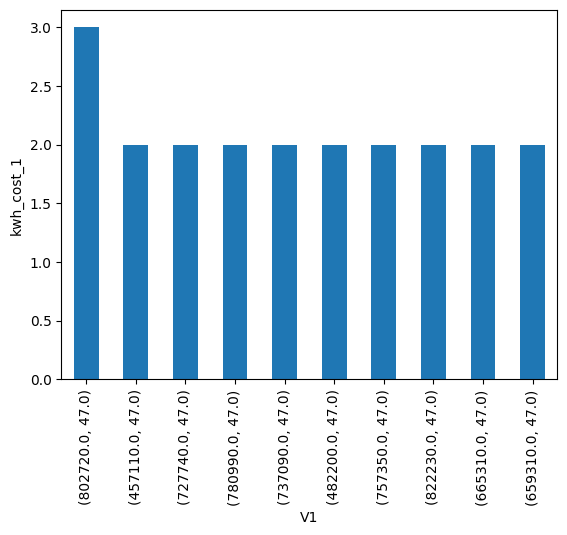

In [72]:
ext_new.groupby(ext_new['V1'])['kwh_cost_1'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('V1')
plt.ylabel('kwh_cost_1')
plt.show()

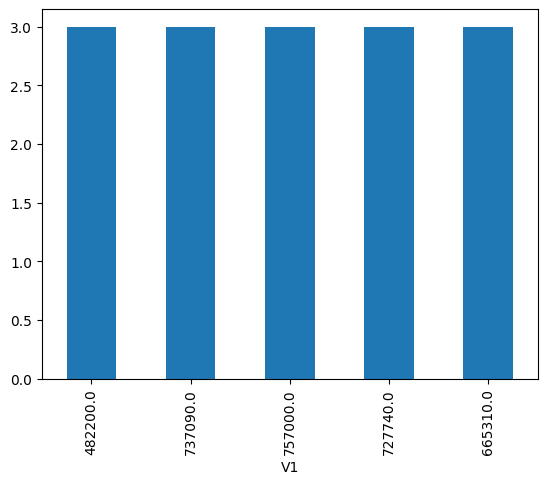

In [73]:
ext_new['V1'].value_counts().sort_values(ascending=False).head().plot(kind='bar')
plt.show()

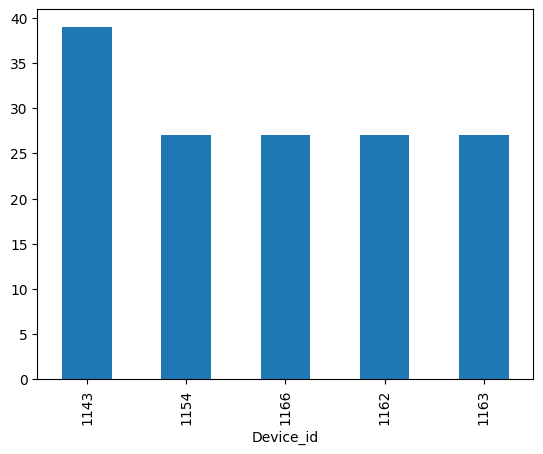

In [74]:
ext['Device_id'].value_counts().sort_values(ascending=False).head().plot(kind='bar')
plt.show()

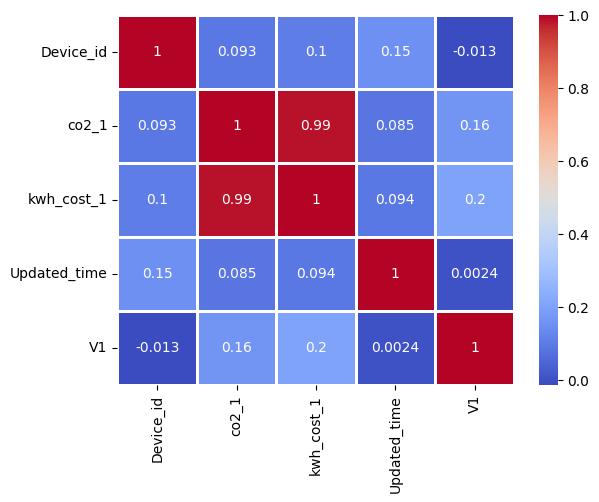

In [75]:
sns.heatmap(ext_new.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.show()

In [76]:
ext_new.describe()

,co2_1,kwh_cost_1,Updated_time,V1
count,587.000000,587.000000,587,5.870000e+02
mean,0.007297,94.037479,2024-09-05 07:27:58.872231936,1.600382e+06
min,0.000075,1.000000,2024-08-14 23:59:03,2.000000e+02
25%,0.003975,47.000000,2024-08-24 23:59:03,7.887550e+05
50%,0.006789,84.000000,2024-09-04 23:59:03,1.406960e+06
75%,0.009075,121.000000,2024-09-15 23:59:03,2.200450e+06
max,0.042825,571.000000,2024-09-27 23:59:03,3.867720e+06
std,0.005216,70.804750,NaN,1.016612e+06


# Outliers Detect & Removal

In [77]:
# Using IQR for remove outlires

for cols in ['co2_1','kwh_cost_1','V1']:
  lower = ext_new[cols].quantile(0.25)
  upper = ext_new[cols].quantile(0.75)
  iqr = upper-lower

  lower_bond = lower -1.5 * iqr
  upper_bond = upper + 1.5 * iqr
  ext_new = ext_new[(ext_new[cols] >= lower_bond) & (ext_new[cols] <= upper_bond) ]

In [78]:
ext_new

,Device_id,co2_1,kwh_cost_1,Updated_time,V1
0,1143,0.000300,4.0,2024-08-14 23:59:03,2047470.0
1,1145,0.000075,1.0,2024-08-14 23:59:03,747900.0
2,1146,0.006789,47.0,2024-08-14 23:59:03,402110.0
3,1148,0.001050,14.0,2024-08-14 23:59:03,1359750.0
4,1149,0.002625,35.0,2024-08-14 23:59:03,3318760.0
...,...,...,...,...,...
582,1162,0.010125,135.0,2024-09-27 23:59:03,2509990.0
583,1163,0.010725,143.0,2024-09-27 23:59:03,290621.0
584,1165,0.004350,58.0,2024-09-27 23:59:03,967420.0
585,1166,0.001350,18.0,2024-09-27 23:59:03,561490.0


In [79]:
for i in ext_new['Updated_time']:
  print(i)

2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-14 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-15 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-16 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03
2024-08-17 23:59:03


In [80]:
#ext_new['Updated_time'] = pd.to_datetime(ext_new['Updated_time'])

In [81]:
ext_new.dtypes

,0
Device_id,object
co2_1,float64
kwh_cost_1,float64
Updated_time,datetime64[ns]
V1,float64


In [82]:
ext_new['date'] = ext_new['Updated_time'].dt.date

In [83]:
ext_new

,Device_id,co2_1,kwh_cost_1,Updated_time,V1,date
0,1143,0.000300,4.0,2024-08-14 23:59:03,2047470.0,2024-08-14
1,1145,0.000075,1.0,2024-08-14 23:59:03,747900.0,2024-08-14
2,1146,0.006789,47.0,2024-08-14 23:59:03,402110.0,2024-08-14
3,1148,0.001050,14.0,2024-08-14 23:59:03,1359750.0,2024-08-14
4,1149,0.002625,35.0,2024-08-14 23:59:03,3318760.0,2024-08-14
...,...,...,...,...,...,...
582,1162,0.010125,135.0,2024-09-27 23:59:03,2509990.0,2024-09-27
583,1163,0.010725,143.0,2024-09-27 23:59:03,290621.0,2024-09-27
584,1165,0.004350,58.0,2024-09-27 23:59:03,967420.0,2024-09-27
585,1166,0.001350,18.0,2024-09-27 23:59:03,561490.0,2024-09-27


# Last 30 Days datas ( Rolling Window )

In [84]:
# Start End Date Data Define

from datetime import date
from datetime import datetime, timedelta

def train_latest_model(data, reference_date):

    # Convert string to date with safety
    if isinstance(reference_date, str):
        try:
            reference_date = pd.to_datetime(reference_date, errors='raise').date()
        except Exception:
            print("Invalid date")
            return None
    # Check valid type
    if reference_date is not None and not isinstance(reference_date, date):
        print("Invalid date")
        return None
    # If no reference_date, use max date
    if reference_date is None:
        reference_date = data['date'].max()
    # Check if the date exists in data
    if reference_date not in data['date'].unique():
        print("Date not found in data")
        return None

    # Compute the 30 days rolling window
    end_date = reference_date                                          # 30th End date
    start_date = end_date - timedelta(days=29)                         # 1st start date,  30-day window

    if start_date in data['date'].unique() :                           # check if start date is there takes, if not takes minimum date's datas
        start_date = start_date
    else:
        start_date = data['date'].min()
        #print("Data not Found.")
        #return None

    # Filter data
    mask = (data['date'] >= start_date) & (data['date'] <= end_date)
    train_data = data.loc[mask]

    unique_days = sorted(train_data['date'].unique())                  # Unique Date

    print(f"Start Date : {start_date}\nEnd Date   : {end_date}\nTodal Days : {len(unique_days)}")         # print start & end dates

    # Calculate cutoff for last 20% of days
    cutoff_index = int(len(unique_days) * 0.8)
    train_days = unique_days[:cutoff_index]
    test_days = unique_days[cutoff_index:]

    # Split the data
    train_df1 = train_data[train_data['date'].isin(train_days)]
    test_df1  = train_data[train_data['date'].isin(test_days)]

    return train_df1, test_df1

In [85]:
# Define End Date

End_date = str(input("Enter the Date (YYYY-MM-DD) "))

if End_date == "":
    End_date = None

try:
    train_df1, test_df1 = train_latest_model(ext_new, reference_date=End_date)    # "2024-00-20"
except TypeError:
    print("Date is invalid or not found in data.")


Enter the Date (YYYY-MM-DD) 
Start Date : 2024-08-29
End Date   : 2024-09-27
Todal Days : 30


In [86]:
train_df1.shape , test_df1.shape

((305, 6), (61, 6))

In [87]:
#train_df1.head()

In [88]:
#test_df1.head()

In [89]:
#train_df1['Device_id'].unique()

In [90]:
#test_df1['Device_id'].unique()

In [91]:
for i in train_df1['Device_id'].unique():
  if i not in test_df1['Device_id'].unique():
    print(i)

1159


In [92]:
train_df1['Device_id'] = train_df1['Device_id'].astype('int64')
test_df1['Device_id'] = test_df1['Device_id'].astype('int64')

In [93]:
test_df1.dtypes

,0
Device_id,int64
co2_1,float64
kwh_cost_1,float64
Updated_time,datetime64[ns]
V1,float64
date,object


# Data Splitting

In [94]:
# Drop Updated_time & date columns

train_df1.drop(['Updated_time', 'date'], axis=1, inplace=True)
test_df1.drop(['Updated_time', 'date'], axis=1, inplace=True)

# Data Divide from Train Data
X_train = train_df1.drop(columns=['kwh_cost_1'], axis=1)
y_train = train_df1['kwh_cost_1']

# Data Divide from Test Data
X_test = test_df1.drop(columns=['kwh_cost_1'], axis=1)
y_test = test_df1['kwh_cost_1']

print(f"Traning data : {X_train.shape}, {y_train.shape}")
print(f"Testing data : {X_test.shape}, {y_test.shape}")

Traning data : (305, 3), (305,)
Testing data : (61, 3), (61,)


In [95]:
X_train.dtypes

,0
Device_id,int64
co2_1,float64
V1,float64


# Feature Scaling

In [96]:
cols = X_train.columns

In [97]:
X_test.columns

Index(['Device_id', 'co2_1', 'V1'], dtype='object')

In [98]:
# Use Minmaxscler to minimize the value
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[cols])
X_test = scaler.transform(X_test[cols])

In [99]:
#X_test

# Model Algorithm

MSE: 114.2668
MAE: 6.5977
MAPE: 0.1304
R2: 0.9589


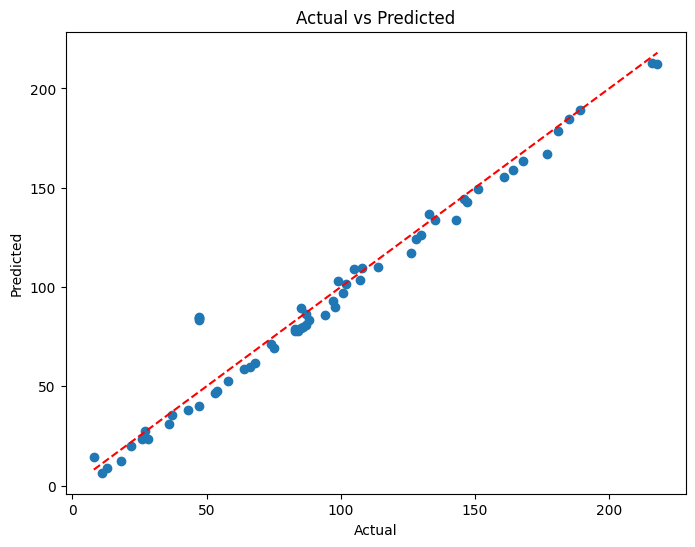

In [100]:
# LinearRegressiion

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, lr_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, lr_pred):.4f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, lr_pred):.4f}')
print(f'R2: {r2_score(y_test, lr_pred):.4f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, lr_pred)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

MSE: 220.7920
MAE: 9.8975
MAPE: 0.1339
R2: 0.9206


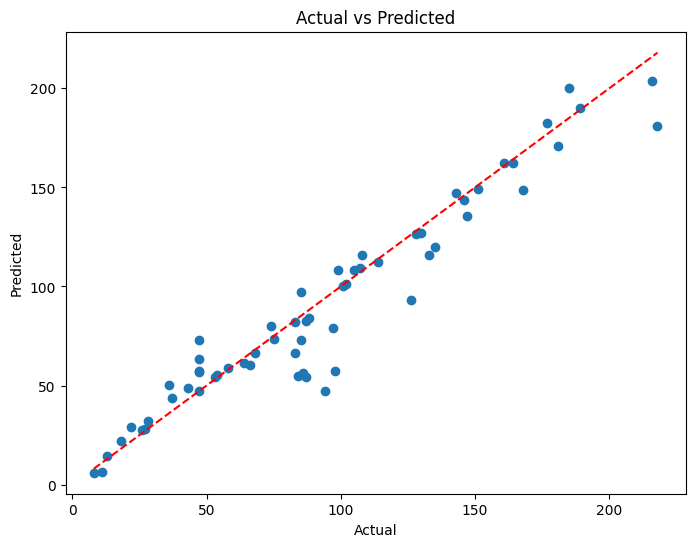

In [101]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, knn_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, knn_pred):.4f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, knn_pred):.4f}')
print(f'R2: {r2_score(y_test, knn_pred):.4f}')

# Actual Vs Predict
plt.figure(figsize=(8,6))
plt.scatter(y_test, knn_pred)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

MSE: 199.1035
MAE: 7.6537
MAPE: 0.1263
R2: 0.9284


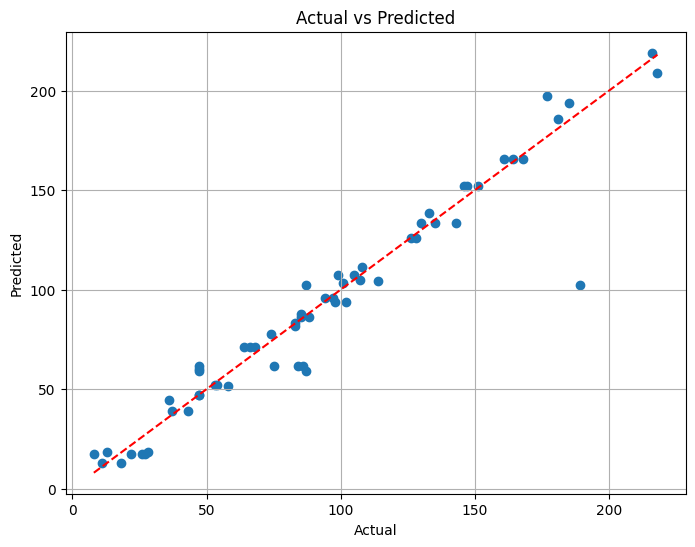

In [102]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='poisson', max_depth=10 , max_features='log2', min_samples_split=10, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, dt_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, dt_pred):.4f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, dt_pred):.4f}')
print(f'R2: {r2_score(y_test, dt_pred):.4f}')


# Actual Vs Predict
plt.figure(figsize=(8,6))
plt.scatter(y_test, dt_pred)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

MSE: 200.3154
MAE: 9.9551
MAPE: 0.1840
R2: 0.9280


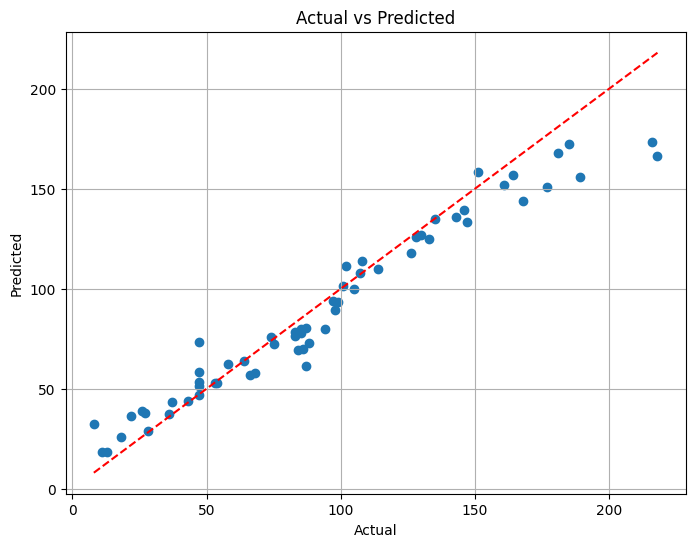

In [103]:
# RandomForest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators =100,criterion ='squared_error', max_depth=10 , max_features='sqrt', min_samples_split=4, min_samples_leaf=2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, rf_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, rf_pred):.4f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, rf_pred):.4f}')
print(f'R2: {r2_score(y_test, rf_pred):.4f}')

# Actual Vs Predict
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

## SVR

In [104]:
from sklearn.svm import SVR

MSE: 123.6035
MAE: 2.9403
MAPE: 0.0623
R2: 0.9556


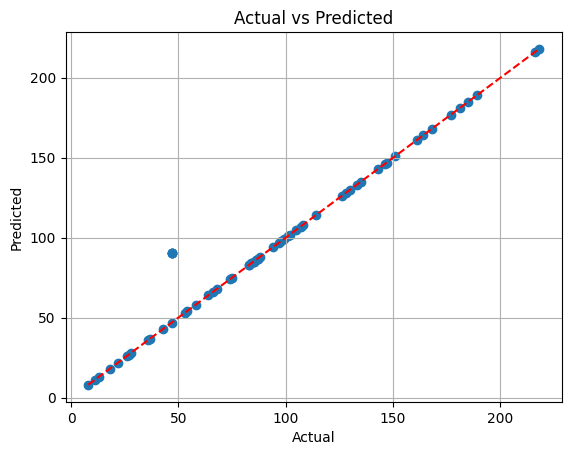

In [105]:
svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1).fit(X_train, y_train)
svr_pred = svr.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, svr_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, svr_pred):.4f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, svr_pred):.4f}')
print(f'R2: {r2_score(y_test, svr_pred):.4f}')

plt.scatter(y_test, svr_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# Cross Validation

In [106]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
param = {
    'n_estimators' : [86,23,17],
    'criterion' : ['squared_error', 'absolute_error'],
    'bootstrap':[True, False],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [3,5],
    'min_samples_split' : [ 4 ,6],
    'min_samples_leaf' : [3,5]
}

In [108]:
"""gs_cv = GridSearchCV(estimator = rf, param_grid=param, cv=5, n_jobs=-1, verbose=2)
gs_cv.fit(X_train, y_train)
rf_gs= gs_cv.best_estimator_.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, rf_gs):.4f}')
print(f'MAE: {mean_absolute_error(y_test, rf_gs):.4f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, rf_gs):.4f}')
print(f'R2: {r2_score(y_test, rf_gs):.4f}')

plt.scatter(y_test, rf_gs)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()"""

'gs_cv = GridSearchCV(estimator = rf, param_grid=param, cv=5, n_jobs=-1, verbose=2)\ngs_cv.fit(X_train, y_train)\nrf_gs= gs_cv.best_estimator_.predict(X_test)\n\nprint(f\'MSE: {mean_squared_error(y_test, rf_gs):.4f}\')\nprint(f\'MAE: {mean_absolute_error(y_test, rf_gs):.4f}\')\nprint(f\'MAPE: {mean_absolute_percentage_error(y_test, rf_gs):.4f}\')\nprint(f\'R2: {r2_score(y_test, rf_gs):.4f}\')\n\nplt.scatter(y_test, rf_gs)\nplt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],\'r--\')\nplt.xlabel("Actual")\nplt.ylabel("Predicted")\nplt.title("Actual vs Predicted")\nplt.grid(True)\nplt.show()'

# Drift Checking

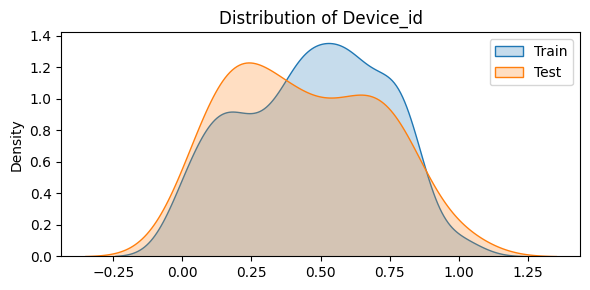

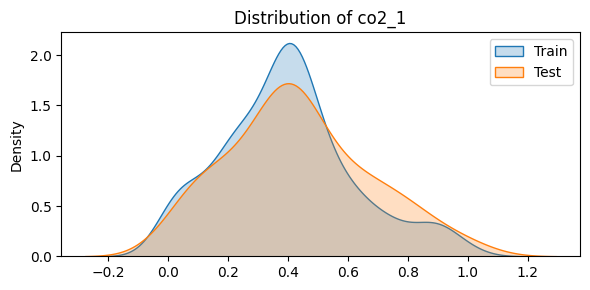

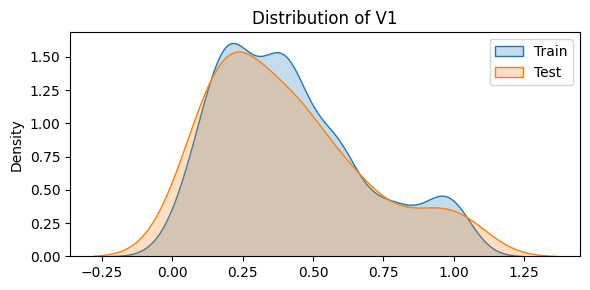

In [109]:
for col in cols:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(X_train[:, cols.get_loc(col)], label='Train', shade=True)
    sns.kdeplot(X_test[:, cols.get_loc(col)], label='Test', shade=True)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.tight_layout()  # ensures labels/legend fit
  #  plt.savefig(f'drift_check_{col}.png')
    plt.show()


In [110]:
from scipy.stats import ks_2samp

col_idx = cols.get_loc('Device_id')
stat, p_value = ks_2samp(X_train[:, col_idx], X_test[:, col_idx])

print(f"KS Statistic: {stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("⚠️ Significant drift detected in 'Device_id'")
else:
    print("✅ No significant drift in 'Device_id'")


KS Statistic: 0.1049, p-value: 0.6066
✅ No significant drift in 'Device_id'


In [111]:
import joblib

joblib.dump(rf, 'rf_model.pkl')
joblib.dump(svr, 'svr_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [112]:
rf1 = joblib.load('rf_model.pkl')

In [113]:
rf1.predict(X_test)

array([111.27323631,  89.52751587,  73.35518651,  51.43808616,
        53.40552931,  32.58163095,  18.38763492,  38.76330952,
       113.96505267,  36.32734174,  38.09561555, 139.19325541,
       150.8055    ,  43.91773052,  52.64740347, 126.89720957,
        46.80645097,  99.7027868 ,  61.16436956,  76.45168254,
       172.57159524, 101.59411946,  80.49605411, 173.37421032,
       117.98882143,  80.07803968,  56.87183582, 126.02940005,
        29.03096429,  76.00143759,  78.00027045,  69.53231389,
        93.82180952, 156.71609632, 158.36519841,  58.27458637,
        63.84116414,  52.8816026 , 133.17277559,  18.5980119 ,
        93.31209632,  37.55891667,  73.04011797, 155.84242063,
       107.97882251, 167.92909127,  79.65027778,  78.34141667,
        57.91257572, 166.31234127,  69.80436151,  43.13044094,
       124.68834524,  72.26921625, 151.91949206, 110.00882196,
       134.63435859, 135.67514286,  62.333886  ,  25.74524242,
       143.94793326])

In [114]:
sv=joblib.load('svr_model.pkl')
sv.predict(X_test)

array([101.89995645,  97.89987777,  90.41439457,  90.41438345,
        90.41440035,   7.90010348,  12.89998389,  25.90000245,
       107.90002704,  21.90002868,  26.9000573 , 145.89998568,
       176.89988197,  42.90001203,  52.89999395, 129.89999353,
        90.41446972, 104.90011029,  86.90000674,  82.90003719,
       184.90004322, 100.90006294,  86.89995121, 215.89987806,
       125.89985828,  84.89991854,  65.89992069, 127.89993103,
        27.8999688 ,  73.89997858,  84.90006023,  83.89994972,
        96.89996832, 163.8999402 , 150.89999852,  46.89998796,
        63.90000784,  53.90000364, 146.8999976 ,  10.90006002,
        98.90012515,  35.90005285,  87.90006416, 188.89991824,
       106.8999211 , 180.89991383,  93.89989066,  82.89993045,
        67.89992969, 217.89987938,  85.89993847,  36.90002069,
       132.90004241,  74.89996638, 160.89993441, 113.89999098,
       134.90002092, 142.89993072,  57.90002747,  17.90004407,
       167.89999436])

In [115]:
y_test

,kwh_cost_1
521,102.0
522,98.0
523,47.0
524,47.0
525,47.0
...,...
582,135.0
583,143.0
584,58.0
585,18.0


In [116]:
"0.008100	108.0		2186380.0"
scal = joblib.load('scaler.pkl')
ip= scal.transform([[1145,0.008100,2186380.0]])
sv.predict(ip)

array([107.89994254])

In [117]:
scal.transform([[1145,0.008100,2186380.0]])

array([[0.06666667, 0.48636364, 0.57163402]])